In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('MNIST_784', version=1, cache=True)

X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [2]:
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(X.shape[1])]

df = pd.DataFrame(X, columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i:str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [3]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

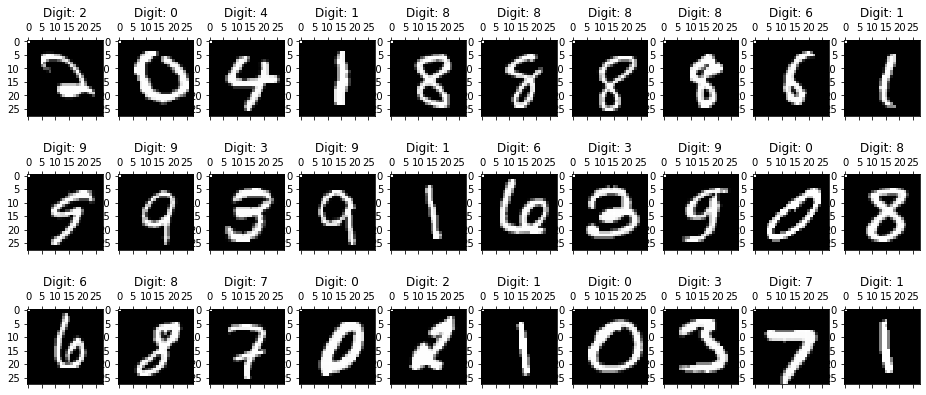

In [4]:
import matplotlib.pyplot as plt

# Plot the Grogh
plt.gray()
fig = plt.figure(figsize=(16,7))
for i in range(0,30):
    ax = fig.add_subplot(3, 10, i+1, title='Digit: ' + str(df.loc[rndperm[i], 'label']))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca.result[:.1]
df['pca-three'] = pca.result[:,2]

print('Explained varation per principle component: {}'.format(pca.explained_variance_ratio_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df[feat_cols].dropna(axis=1)

In [ ]:
df